<a href="https://colab.research.google.com/github/theaveas/DeepLearning/blob/main/DLwithPython/Chapter05_dlwithpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentals of ML
- The concept of generalization and optimization, the fundamental issue in ML
- Evaluation method, how to evaluate model performance?
- Best practices to improve model fitting
- Best practives to achieve better generalizaton

**Overfitting** : In ML, the model that we build is not use to predict the data that we have seen. The main purpose of Machine Learning is to learn from the Data we fit into a model, and try to predict the result of and unseen data. While training A Model give a really impressive result (minimal loss) In real life this is a good result, but in ML is model is not *gereralization* It performs well only with the data we fit throught, not the unseen one. This model started to ***overfit***.

**Underfitting:** occure at the beginning of the trainning process. the lower the loss on training data, the lower the loss on test data.

**Optimization:** refers to the process of adjusting a model to get the best performance possible on the training data. (over done is lead to *overfit* model)

**Generalization:** refers to how well the trained model performs on data it has never seen before (over done is lead to *underfit* model)

**Ambiguous Features:** Could be a non objective boundaries(classifiaction problems), data that have a measurement of probabiliy(weather)

**Rare Features and Spurious correlations:** While train on a dataset that have a rare feature, that is not mean all other data have this same rarely feature to(overfitting).

### Training the smae model on MNIST data with noise channels or all-zero channels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist

from tensorflow.keras.layers import Dense

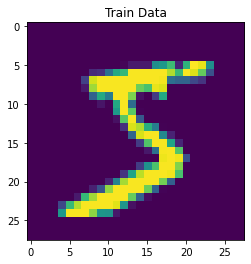

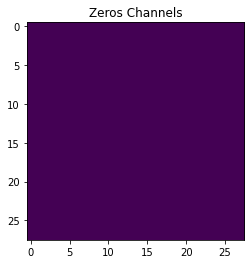

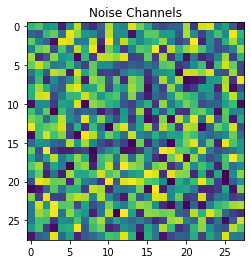

In [ ]:
# load dataset
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
plt.imshow(train_data[0])
plt.title("Train Data")
plt.show()
train_data = train_data.reshape((60000, 28*28))
trian_data = train_data.astype('float32') / 255

# noise channels
zeros_channels = np.array((np.zeros((len(train_data), 784))))
zeros_channels = zeros_channels.reshape((60000, 28, 28))
plt.imshow(zeros_channels[0])
plt.title("Zeros Channels")
plt.show()

# noise channels
noise_channels = np.array((np.random.random((len(train_data), 784))))
noise_channels = noise_channels.reshape((60000, 28, 28))
plt.imshow(noise_channels[0])
plt.title("Noise Channels")
plt.show()

In [ ]:
# concatenate with trainning examples
noise_channels = noise_channels.reshape((len(noise_channels), 28*28))
zeros_channels = zeros_channels.reshape((len(zeros_channels), 28*28))

# concat with noise channels
train_data_with_nc = np.concatenate(
    [train_data, noise_channels], axis=1
)

# concat with zeros channels
train_data_with_zc = np.concatenate(
    [train_data, zeros_channels], axis=1
)

In [ ]:
def build_model():
    model = keras.Sequential([
        Dense(512, activation='relu'),
        Dense(10, activation='softmax'),
    ])
    
    model.compile(
        optimizer = 'rmsprop',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy'],
    )
    
    return model

In [ ]:
# Train a noise model
EPOCHS = 15
BATCH_SIZE = 128

model = build_model()
history_noise = model.fit(
    train_data_with_nc,
    train_labels,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    verbose=10
)

history_zeros = model.fit(
    train_data_with_zc,
    train_labels,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    verbose=10
)

Epoch 1/15


2022-02-25 18:10:03.264160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-25 18:10:05.510487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15
Epoch 1/15
Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15


In [ ]:
hist_noise = history_noise.history
hist_zeros = history_zeros.history

# plot the result
def val_result_plot():
    val_acc_noise = hist_noise["val_accuracy"]
    val_acc_zeros = hist_zeros["val_accuracy"]
    epochs = range(1, 11)
    
    plt.plot(epochs, val_acc_noise, 'b', 
             label="Validation Accuraccy with Noise data")
    plt.plot(epochs, val_acc_zeros, 'r--', 
             label="Validation Accuraccy with Zeros data")
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")
    plt.title("Effect of noise channels on validation accuracy")
    plt.legend()
    plt.show
    
val_result_plot()